In [20]:
import datetime
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn import tree
from sklearn import metrics
import matplotlib.pyplot as plt

## 讀取資料

In [21]:
stocks_data = pd.read_excel(f'top200_training.xls')
stocks_data = stocks_data.drop(columns=['證券代碼'])
stocks_data

,簡稱,年月,市值(百萬元),收盤價(元)_年,本益比,股價淨值比,股價營收比,M淨值報酬率─稅後,資產報酬率ROA,營業利益率OPM,利潤邊際NPM,負債/淨值比,M流動比率,M速動比率,M存貨週轉率 (次),M應收帳款週轉次,M營業利益成長率,M稅後淨利成長率,Return,ReturnMean_year_Label
0,台積電,199712,457105,15.24,3.4636,0.89594,1.41640,0.144140,0.223790,0.339850,0.408870,0.55256,223.86,177.18,5.99,6.34,-18.13,-8.00,-6.3648,1
1,聯電,199712,263536,20.55,9.1333,1.27240,3.38550,0.111460,0.145880,0.142950,0.388200,0.30889,338.15,303.48,5.27,6.80,-41.39,27.37,-18.0049,1
2,中鋼,199712,181781,5.53,2.6209,0.35770,0.42117,0.077890,0.136380,0.227920,0.160150,0.75094,85.46,26.60,4.10,22.41,44.39,63.01,-9.2224,1
3,南亞,199712,175637,14.81,6.6116,0.74949,0.40821,0.035977,0.099458,0.091372,0.061046,1.76440,133.30,80.55,4.36,7.00,8.65,-15.94,-12.0864,1
4,華碩,199712,166991,158.47,7.0746,2.59620,2.39490,0.300880,0.356970,0.269490,0.329330,0.18643,556.46,476.72,7.60,23.93,52.07,84.82,46.2737,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2595,厚生,200912,14782,27.90,12.5676,1.64020,4.18920,0.083303,0.130750,0.358990,0.333590,0.56954,223.26,36.56,0.31,21.41,30.32,22.21,-100.0000,-1
2596,長虹,200912,14688,59.85,10.7451,2.14750,3.57740,0.079729,0.187880,0.326690,0.313710,1.35650,171.65,10.52,0.18,6.45,-22.01,-22.13,-100.0000,-1
2597,聯陽,200912,14621,69.66,28.5492,2.23840,3.57230,0.069504,0.078390,0.116460,0.125090,0.12785,506.27,436.92,5.67,6.58,7.16,20.48,-100.0000,-1
2598,太子,200912,14608,15.25,23.4615,1.27720,1.09160,0.015046,0.051981,0.075285,0.046454,2.45490,122.82,14.40,0.59,13.82,932.82,208.68,-100.0000,-1


### 擷取股票年份

In [22]:
data_years = stocks_data['年月'].unique()
data_years

array([199712, 199812, 199912, 200012, 200112, 200212, 200312, 200412,
       200512, 200612, 200712, 200812, 200912], dtype=int64)

### 擷取股票簡稱

In [23]:
all_stocks = stocks_data['簡稱'].unique()
all_stocks

array(['台積電       ', '聯電         ', '中鋼         ', '南亞         ',
       '華碩         ', '台塑         ', '日月光       ', '大同         ',
       '台化         ', '統一         ', '鴻海         ', '茂矽         ',
       '英業達       ', '華邦電       ', '裕隆         ', '旺宏         ',
       '台泥         ', '太電         ', '長榮         ', '華航         ',
       '亞泥         ', '台達電       ', '華通         ', '國建         ',
       '中華         ', '國產車       ', '矽品         ', '國巨         ',
       '東元         ', '國揚         ', '三陽         ', '台玻         ',
       '中石化       ', '統一超       ', '中環         ', '陽明         ',
       '東雲         ', '味全         ', '福懋         ', '佳世達       ',
       '合泰         ', '中工         ', '正新         ', '太設         ',
       '中保         ', '南紡         ', '士紙         ', '國產         ',
       '亞瑟         ', '遠航         ', '力廣         ', '聯強         ',
       '錸德         ', '致福         ', '長億         ', '震旦行       ',
       '藍天         ', '華泰         ', '統一實       ', '光罩         ',
      

## 資料正規化
### Min-Max Normalization

In [24]:
for col in stocks_data.columns[2:-2]:
    stocks_data[col] = (stocks_data[col] - stocks_data[col].min()) / (stocks_data[col].max() - stocks_data[col].min())

## 計算相關係數，取絕對值後排序

In [25]:
correlation = stocks_data.corr()['Return'].abs().sort_values(ascending=False)
print(correlation)
#correlation = correlation.drop(index=['年月', 'Return', 'ReturnMean_year_Label'])
#correlation =  correlation / sum(correlation.values)
#print(correlation)

Return                   1.000000
ReturnMean_year_Label    0.571415
股價淨值比                    0.175714
收盤價(元)_年                 0.172179
股價營收比                    0.102570
M淨值報酬率─稅後                0.073382
資產報酬率ROA                 0.050945
市值(百萬元)                  0.045537
營業利益率OPM                 0.040239
利潤邊際NPM                  0.039594
M稅後淨利成長率                 0.036695
M存貨週轉率 (次)               0.030282
M速動比率                    0.019022
M流動比率                    0.009868
負債/淨值比                   0.009321
年月                       0.008267
本益比                      0.006260
M營業利益成長率                 0.004976
M應收帳款週轉次                 0.001473
Name: Return, dtype: float64


C:\TempFiles\ipykernel_9652\999004108.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = stocks_data.corr()['Return'].abs().sort_values(ascending=False)


## 保留前五重要之特徵

In [26]:
#stocks_data = stocks_data[['簡稱', '年月', '股價淨值比', '收盤價(元)_年', '股價營收比', 'M淨值報酬率─稅後', '資產報酬率ROA', 'Return', 'ReturnMean_year_Label']]
#stocks_data

## 切割TV (1997 ~ 2009)

In [27]:
TV = 9
basic_train_data = stocks_data[stocks_data['年月'].isin(data_years[:TV])]
train_label = basic_train_data['ReturnMean_year_Label']
train_data = basic_train_data.drop(columns=['簡稱', '年月', 'Return', 'ReturnMean_year_Label'])

basic_test_data = stocks_data[stocks_data['年月'].isin(data_years[TV:])]
test_label = basic_test_data['ReturnMean_year_Label']
test_data = basic_test_data.drop(columns=['簡稱', '年月', 'Return', 'ReturnMean_year_Label'])

## Decision Tree

### 建立模型

In [28]:
decisionTreeModel = tree.DecisionTreeClassifier()

### 訓練模型

In [29]:
stock_dt = decisionTreeModel.fit(train_data, train_label)

### 繪製樹狀圖

[Text(0.4984584618585977, 0.98, 'X[3] <= 0.157\ngini = 0.487\nsamples = 1800\nvalue = [1047, 753]'),
 Text(0.3079036917352135, 0.94, 'X[5] <= 0.843\ngini = 0.496\nsamples = 640\nvalue = [292, 348]'),
 Text(0.22489473168820995, 0.9, 'X[3] <= 0.154\ngini = 0.498\nsamples = 620\nvalue = [291, 329]'),
 Text(0.08519388954171563, 0.86, 'X[0] <= 0.002\ngini = 0.487\nsamples = 391\nvalue = [164, 227]'),
 Text(0.03055229142185664, 0.82, 'X[4] <= 0.001\ngini = 0.491\nsamples = 111\nvalue = [63, 48]'),
 Text(0.01253427340383862, 0.78, 'X[1] <= 0.002\ngini = 0.413\nsamples = 24\nvalue = [7, 17]'),
 Text(0.00626713670191931, 0.74, 'X[14] <= 0.141\ngini = 0.444\nsamples = 6\nvalue = [4, 2]'),
 Text(0.003133568350959655, 0.7, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.009400705052878966, 0.7, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.01880141010575793, 0.74, 'X[1] <= 0.007\ngini = 0.278\nsamples = 18\nvalue = [3, 15]'),
 Text(0.015667841754798278, 0.7, 'gini = 0.0\nsamples = 13\nva

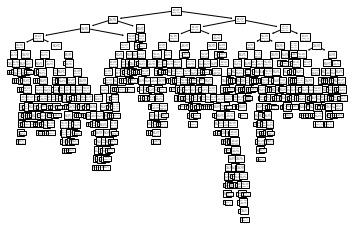

In [30]:
tree.plot_tree(stock_dt)

## 特徵重要程度

In [31]:
dt_feature_important = pd.Series(decisionTreeModel.feature_importances_, index=train_data.columns).sort_values(ascending=False)
dt_feature_important

股價淨值比         0.115951
M淨值報酬率─稅後     0.090438
M稅後淨利成長率      0.088713
M存貨週轉率 (次)    0.081458
M營業利益成長率      0.077864
市值(百萬元)       0.076854
股價營收比         0.068349
M應收帳款週轉次      0.064558
負債/淨值比        0.056070
資產報酬率ROA      0.055422
利潤邊際NPM       0.054728
收盤價(元)_年      0.044693
M速動比率         0.041798
M流動比率         0.038196
營業利益率OPM      0.034625
本益比           0.010282
dtype: float64

## 模型評估
scikit-learn 決策樹迴歸模型的score函式是R2 score，可作為模型評估依據，其數值越接近於1代表模型越佳。
### 使用訓練資料評估

In [32]:
print('R2 score: ', stock_dt.score(train_data, train_label))


train_prediction = stock_dt.predict(train_data)
mse = metrics.mean_squared_error(train_label, train_prediction)
print('MSE score: ', mse)

R2 score:  1.0
MSE score:  0.0


## 預測結果

### 使用測試資料預測

In [33]:
print('R2 score: ', stock_dt.score(test_data, test_label))

test_prediction = stock_dt.predict(test_data)
mse = metrics.mean_squared_error(test_label, test_prediction)
print('MSE score: ', mse)

R2 score:  0.5675
MSE score:  1.73


In [34]:
label = test_label.reset_index(drop=True)
label

0     -1
1     -1
2      1
3      1
4      1
      ..
795   -1
796   -1
797   -1
798   -1
799   -1
Name: ReturnMean_year_Label, Length: 800, dtype: int64

### 建立混淆矩陣
水平為預測，垂直為現實

In [35]:
cm = metrics.confusion_matrix(test_label, test_prediction, labels=[1, -1])
cm

array([[118, 138],
       [208, 336]], dtype=int64)

### 矩陣分析

In [36]:
print(f'predict 1 and label 1: {cm[0][0]}, predict -1 and label 1: {cm[0][1]}')
print(f'predict 1 and label -1: {cm[1][0]}, predict -1 and label -1: {cm[1][1]}')

predict 1 and label 1: 118, predict -1 and label 1: 138
predict 1 and label -1: 208, predict -1 and label -1: 336


### 準確率

In [37]:
accuracy = (cm[0][0] + cm[1][1]) / len(test_label)
print(f'accuracy: {accuracy}')

accuracy: 0.5675


### 報酬率變化圖

C:\TempFiles\ipykernel_9652\176456450.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  (basic_test_data.groupby('年月').mean()['Return'] * 0.01 + 1).cumprod().plot(color = 'red')
C:\TempFiles\ipykernel_9652\176456450.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  (basic_test_data[test_prediction > 0].groupby('年月').mean()['Return'] * 0.01 + 1).cumprod().plot(color='green')
C:\TempFiles\ipykernel_9652\176456450.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only 

<AxesSubplot: xlabel='年月'>

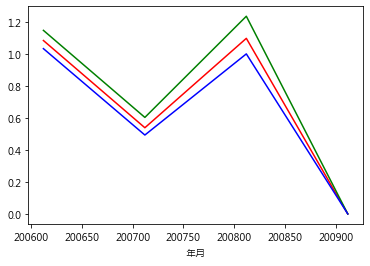

In [38]:
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei']  #顯示中文
#* 不進行篩選的報酬率
(basic_test_data.groupby('年月').mean()['Return'] * 0.01 + 1).cumprod().plot(color = 'red')
#* 模型預測上漲的股票，形成的投組報酬率
(basic_test_data[test_prediction > 0].groupby('年月').mean()['Return'] * 0.01 + 1).cumprod().plot(color='green')
#* 反向篩選出的報酬率
(basic_test_data[test_prediction < 0].groupby('年月').mean()['Return'] * 0.01 + 1).cumprod().plot(color='blue')